# Setting up our Notebook

In [14]:
# Things to import

# Standard data, plotting, and mathematical tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Statistical Tools
import statsmodels.api as sm

# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras import utils
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf

# Grid Search
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Importing the data

In [4]:
# Importing the data for BTC

dfs=['PCA 24 Hourly BTC.csv', 'PCA 24 Hourly ETH.csv', 'PCA 24 Hourly ADA.csv']

# LSTM

## Getting the training and testing data

In [5]:
# Train and test splitting and scaling
X=pd.read_csv(dfs[0])
y=X['Label']
X=X.drop('Label', axis=1)
X=X.drop('Unnamed: 0', axis=1)
X=X.values

num_classes=3 

# # split into train and test
# X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=100, shuffle=True)
# X_train, X_test, y_train, y_test=train_test_split(X_train, y_train,test_size=0.2, random_state=100, shuffle=True)

# y_train = utils.to_categorical(y_train, num_classes)
# y_test = utils.to_categorical(y_test, num_classes)
# y_val = utils.to_categorical(y_val, num_classes)

In [6]:
# Setting up the generator

# define generator
n_input = 2 # How many time periods into the past we will look
n_features = 20 # Number of PCA features
X = X.reshape((len(X), n_features))
generator = TimeseriesGenerator(X, y, length=n_input, batch_size=1)


In [7]:
print(generator[0][0][0])
print(generator[0][1][0])
print(X[1])
print(y[1])
print(X[2])
print(y[2])

[[-3.97463026 -2.47490299  4.36937512  1.16341295  2.02626529 -1.04510705
  -2.16191018 -0.78818485 -1.08221859 -1.58568009 -0.58034766  0.41746317
   0.19465733 -0.07952356  0.02262383 -0.28917062  0.35130785  0.13369728
   0.16635575  0.44182287]
 [-4.004122   -2.43223371  1.8593727   3.58810242  1.42003146 -1.99500603
  -3.0710325  -0.55270049 -0.02329188 -0.75281388 -0.93464133  0.10561485
   0.62154312 -0.15020801  0.25987712 -0.48926378 -0.13381247  0.35978713
   0.02737289  0.73648029]]
1.0
[-4.004122   -2.43223371  1.8593727   3.58810242  1.42003146 -1.99500603
 -3.0710325  -0.55270049 -0.02329188 -0.75281388 -0.93464133  0.10561485
  0.62154312 -0.15020801  0.25987712 -0.48926378 -0.13381247  0.35978713
  0.02737289  0.73648029]
1.0
[-3.85074086 -4.62666408  4.93777156  0.91348167  1.72592524 -0.011953
 -1.44544808 -0.84295537 -1.90628512 -1.64809063 -0.63739946  0.23183053
  0.19237427  0.05423635  0.00916496 -0.24690443 -0.0700142   0.05299091
  0.00514239  0.10932789]
1.0


In [86]:
# Creating feature and dep variable matrices
X=pd.read_csv(dfs[0])
y=X['Label']
X=X.drop('Label', axis=1)
X=X.drop('Unnamed: 0', axis=1)
X=X.values
X_prep=[]
y_prep=[]

num_classes=3 
n_input = 2 # How many time periods into the past we will look
n_features = 20 # Number of PCA features

for i in range(n_input, len(X)):
    lag_set=X[i-n_input:i]
    X_prep.append(lag_set) # We are taking the last n_input to the present time periods as the 
    # X values. We have to add the +1 to include the present.
    y_prep.append(y[i-1]) # We are hoping the last n_input values will be able to predict the
    # n_input+1th value
X_prep=np.array(X_prep) # They need to be arrays
y_prep=np.array(y_prep)

print(X_prep.shape) # Confirming that the shape of X_prep is (n_instances, n_input, by n_features)
print(X_prep[1], y_prep[1])

(38199, 2, 20)
[[-4.004122   -2.43223371  1.8593727   3.58810242  1.42003146 -1.99500603
  -3.0710325  -0.55270049 -0.02329188 -0.75281388 -0.93464133  0.10561485
   0.62154312 -0.15020801  0.25987712 -0.48926378 -0.13381247  0.35978713
   0.02737289  0.73648029]
 [-3.85074086 -4.62666408  4.93777156  0.91348167  1.72592524 -0.011953
  -1.44544808 -0.84295537 -1.90628512 -1.64809063 -0.63739946  0.23183053
   0.19237427  0.05423635  0.00916496 -0.24690443 -0.0700142   0.05299091
   0.00514239  0.10932789]] 1.0


In [9]:
# split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_prep, y_prep,test_size=0.2, random_state=100, shuffle=True)
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train,test_size=0.2, random_state=100, shuffle=True)

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

print(X_train.shape) # Confirming that the shape of X_prep is (n_instances, n_input, by n_features)

(24447, 2, 20)


In [10]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
 
# Initialising the RNN
model = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
model.add(LSTM(units = 100, activation = 'relu', input_shape = (n_input, n_features), 
               return_sequences=True))

# Adding a dropout layer of 20%
model.add(Dropout(0.2))

# Adding the Second Second hidden layer and the LSTM layer
model.add(LSTM(units = 50, activation = 'relu', input_shape = (n_input, n_features), 
               return_sequences=True))
 
# Adding a dropout layer of 20%
model.add(Dropout(0.2))    
    
# Adding the Second Third hidden layer and the LSTM layer
model.add(LSTM(units = 50, activation = 'relu', return_sequences=False )) # We don't need to 
# return the sequences
 
 
# Adding the output layer
model.add(Dense(units = 3, activation='softmax'))
 
# Compiling the RNN
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 100)            48400     
_________________________________________________________________
dropout (Dropout)            (None, 2, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 50)             30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 3)                 153       
Total params: 98,953
Trainable params: 98,953
Non-trainable params: 0
____________________________________________________

In [12]:
# Fitting the RNN
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=10, batch_size=16, shuffle=False)

Epoch 1/10
1528/1528 [==============================] - 10s 4ms/step - loss: 0.5298 - accuracy: 0.7760 - val_loss: 0.4427 - val_accuracy: 0.8135
Epoch 2/10
1528/1528 [==============================] - 6s 4ms/step - loss: 0.4535 - accuracy: 0.8058 - val_loss: 0.4338 - val_accuracy: 0.8148
Epoch 3/10
1528/1528 [==============================] - 6s 4ms/step - loss: 0.4382 - accuracy: 0.8119 - val_loss: 0.4215 - val_accuracy: 0.8196
Epoch 4/10
1528/1528 [==============================] - 6s 4ms/step - loss: 0.4297 - accuracy: 0.8170 - val_loss: 0.4200 - val_accuracy: 0.8230
Epoch 5/10
1528/1528 [==============================] - 6s 4ms/step - loss: 0.4226 - accuracy: 0.8197 - val_loss: 0.4194 - val_accuracy: 0.8216
Epoch 6/10
1528/1528 [==============================] - 6s 4ms/step - loss: 0.4139 - accuracy: 0.8240 - val_loss: 0.4180 - val_accuracy: 0.8233
Epoch 7/10
1528/1528 [==============================] - 6s 4ms/step - loss: 0.4102 - accuracy: 0.8255 - val_loss: 0.4156 - val_accuracy

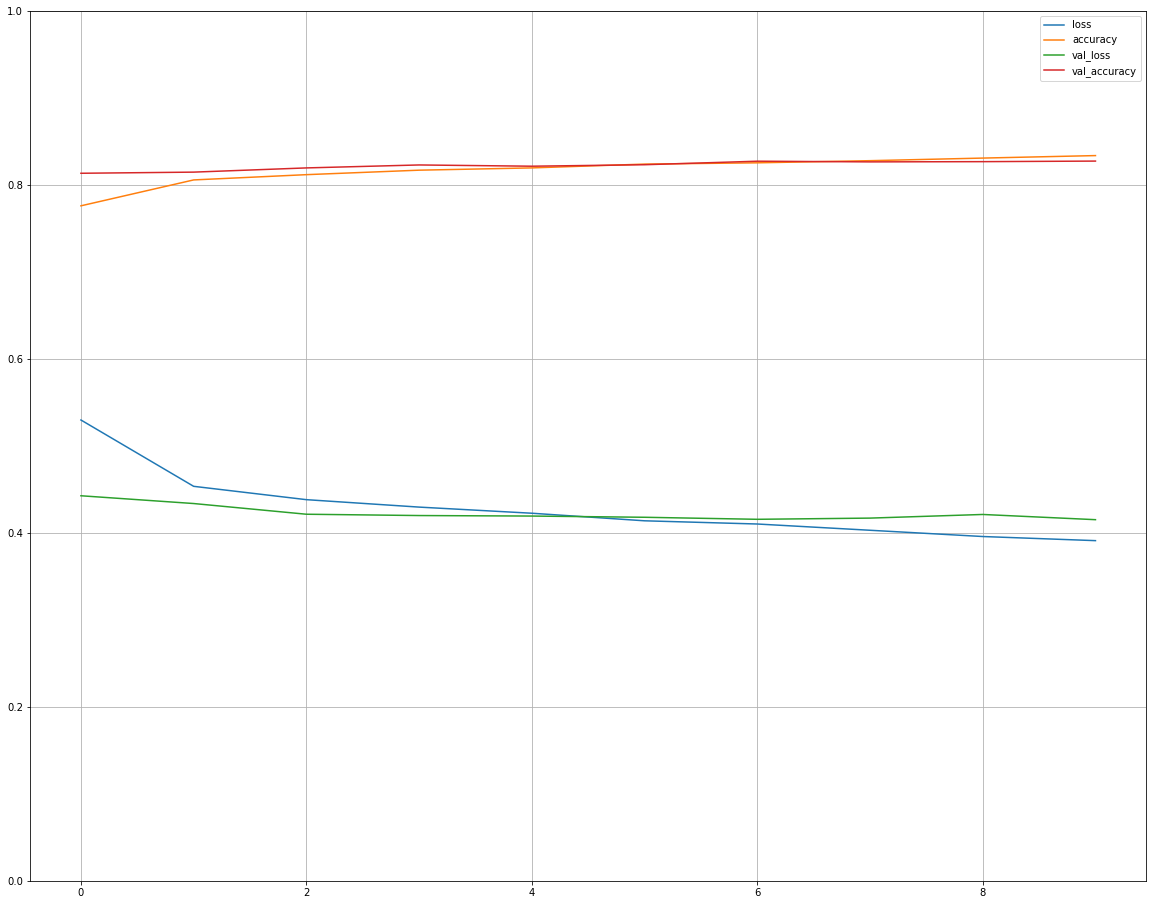

array([[1540,  243,   30],
       [ 237, 1630,  239],
       [  35,  281, 1877]], dtype=int64)

In [13]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Performance
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred)
# print(accuracy_score(y_test, y_pred))

# From Machine Learning in Finance Notebook with Grid Search

## Stationarity

## Augmented Dickey-Fuller Test

We perform an Augmented Dickey-Fuller test to establish stationarity under the assumption that the time series has a constant bias but does not exhibit a time trend. In other words, we assume that the time series is already de-trended.

In [150]:
# We will create a matrix where each element is a full PCA column. 

X=pd.read_csv(dfs[0])
y=X['Label']
X=X.drop('Label', axis=1)
X=X.drop('Unnamed: 0', axis=1)

PCA_matrix=[]
for i in range(len(X.iloc[0])): # Grabs the length of a row, which is the number of features
    PCA_feat=[]
    for j in range(len(X)):
        PCA_feat.append(X.iloc[j][i]) # In column i, adds all the rows to a list, giving us all the elements of that
        # column
    PCA_matrix.append(PCA_feat)

In [152]:
# Augmented Dickey-Fuller Test for each PCA column

for PCA in PCA_matrix:
    sample = PCA
    adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(sample)
    adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
    print(adf_results_string.format(adf, p, nobs, cvs))

ADF: -0.46644327429945454
p-value: 0.8984001984023233,
N: 38146, 
critical values: {'1%': -3.430521439734198, '5%': -2.8616157723227107, '10%': -2.566810331191688}
ADF: -28.671702749175733
p-value: 0.0,
N: 38173, 
critical values: {'1%': -3.4305213184656536, '5%': -2.8616157187264184, '10%': -2.566810302663821}
ADF: -21.890438453899908
p-value: 0.0,
N: 38151, 
critical values: {'1%': -3.430521417264109, '5%': -2.861615762391748, '10%': -2.566810325905703}
ADF: -17.078881104371956
p-value: 7.731928281302704e-30,
N: 38151, 
critical values: {'1%': -3.430521417264109, '5%': -2.861615762391748, '10%': -2.566810325905703}
ADF: -11.877990466821778
p-value: 6.274527909233675e-22,
N: 38147, 
critical values: {'1%': -3.430521435239709, '5%': -2.86161577033631, '10%': -2.56681033013438}
ADF: -22.52787579739349
p-value: 0.0,
N: 38147, 
critical values: {'1%': -3.430521435239709, '5%': -2.86161577033631, '10%': -2.56681033013438}
ADF: -33.31855294330438
p-value: 0.0,
N: 38177, 
critical values: {'

We can clearly see that each of them exibits autocorrelation.

## Autoregressive Model Identification: The partial auto-correlation

The estimated partial auto-correlation function (PACF) can be used to identify the order of an autoregressive time series model. Values of $|\tau_h|$ greater or equal to $\frac{\Phi^{-1}(\alpha)}{\sqrt{T}}$, where $T$ is the number of observations and $\Phi(z)$ is the standard normal CDF, are significant lag $h$ partial autocorelations at the $\alpha$ confidence level.

We use the stattools package to estimate the PACF. The nlags parameter is the maximum number of lags used for PACF estimation.

In [153]:
# Finding the best number of steps for our dataset

n_steps_overall=[]
for i in range(len(PCA_matrix)):
    pacf = sm.tsa.stattools.pacf(PCA_matrix[i], nlags=10)
    T = len(PCA_matrix[i])
    sig_test = lambda tau_h: np.abs(tau_h) > 2.58/np.sqrt(T)
    for k in range(len(pacf)):
        if sig_test(pacf[k]) == False:
            n_steps = k - 1
            n_steps_overall.append(n_steps)
avg_steps=np.floor(np.average(n_steps_overall))
print(avg_steps)

5.0


## Using Grid Search

In [165]:
## Getting our training and testing sets

X_prep=[]
y_prep=[]

num_classes=3 
n_steps = int(avg_steps) # How many time periods into the past we will look. Our avg_steps was a float, so we convert
# it to an integer
n_features = 20 # Number of PCA features

for i in range(n_steps, len(X)):
    lag_set=X.iloc[i-n_steps:i].values
    X_prep.append(lag_set) # We are taking the last n_input to the present time periods as the 
    # X values.
    y_prep.append(y[i-1]) # We are hoping the last n_input values will be able to predict the
    # n_input+1th value
X_prep=np.array(X_prep) # They need to be arrays
y_prep=np.array(y_prep)

print(X_prep.shape)
print(X_prep[1], y_prep[1]) # Confirming that the shape of X_prep is (n_instances, n_steps, by n_features)

(38196, 5, 20)
[[-4.00412200e+00 -2.43223371e+00  1.85937270e+00  3.58810242e+00
   1.42003146e+00 -1.99500603e+00 -3.07103250e+00 -5.52700488e-01
  -2.32918774e-02 -7.52813881e-01 -9.34641328e-01  1.05614846e-01
   6.21543117e-01 -1.50208007e-01  2.59877122e-01 -4.89263780e-01
  -1.33812469e-01  3.59787133e-01  2.73728934e-02  7.36480286e-01]
 [-3.85074086e+00 -4.62666408e+00  4.93777156e+00  9.13481667e-01
   1.72592524e+00 -1.19530010e-02 -1.44544808e+00 -8.42955372e-01
  -1.90628512e+00 -1.64809063e+00 -6.37399463e-01  2.31830532e-01
   1.92374266e-01  5.42363497e-02  9.16496026e-03 -2.46904430e-01
  -7.00142047e-02  5.29909104e-02  5.14238823e-03  1.09327890e-01]
 [-3.83249900e+00 -5.10813508e+00  4.40285250e+00  1.08324970e+00
   1.47526508e+00  1.85180115e-01 -9.87261390e-01 -2.09447819e-01
  -1.50620228e+00 -2.30130361e+00 -5.15593228e-01 -4.41989331e-01
   5.85341858e-01  2.81894604e-01 -5.04073620e-03 -3.15113570e-01
   4.14809627e-01 -2.42589119e-01 -5.60470704e-01  1.543945

In [166]:
# split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_prep, y_prep,test_size=0.2, random_state=100, shuffle=True)
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train,test_size=0.2, random_state=100, shuffle=True)

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

print(X_train.shape) # Confirming that the shape of X_prep is (n_instances, n_steps, by n_features)

(24444, 5, 20)


In [180]:
def create_lstm_model(activ_function='relu', neurons=50, dropout_rate=0.1, num_layers=1, 
                     optimizer='adam'):
    # create model
    model = keras.Sequential()
    
    if num_layers==1:
        #Adding the First input hidden layer and the LSTM layer
        # return_sequences = True, means the output of every time step to be shared with hidden next layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=False)) # For the final later, we don't need to return the sequences
        model.add(keras.layers.Dropout(dropout_rate))

        
    if num_layers==2:
        #Adding the First input hidden layer and the LSTM layer
        # return_sequences = True, means the output of every time step to be shared with hidden next layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=True))
        model.add(keras.layers.Dropout(dropout_rate))
        # Second layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=False)) # For the final later, we don't need to return the sequences
        model.add(keras.layers.Dropout(dropout_rate))

        
    if num_layers==3:
        #Adding the First input hidden layer and the LSTM layer
        # return_sequences = True, means the output of every time step to be shared with hidden next layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=True))
        model.add(keras.layers.Dropout(dropout_rate))
        # Second layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=True))
        model.add(keras.layers.Dropout(dropout_rate))
        # Third layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=False)) # For the final later, we don't need to return the sequences
        model.add(keras.layers.Dropout(dropout_rate))
        
    if num_layers==4:
        #Adding the First input hidden layer and the LSTM layer
        # return_sequences = True, means the output of every time step to be shared with hidden next layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=True))
        model.add(keras.layers.Dropout(dropout_rate))
        # Second layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=True))
        model.add(keras.layers.Dropout(dropout_rate))
        # Third layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=True))
        model.add(keras.layers.Dropout(dropout_rate))
        # Fourth layer
        model.add(keras.layers.LSTM(units = neurons, activation = activ_function, input_shape = (n_steps, n_features), 
               return_sequences=False)) # For the final later, we don't need to return the sequences
        model.add(keras.layers.Dropout(dropout_rate))
        
    # Final layer with softmax for classification
    model.add(keras.layers.Dense(3, activation="softmax"))
        
    # Running through the optimizers
    if optimizer=='adam':
        # Learning Rate Schedule
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=init_lr,
        decay_steps=decay_steps,
        decay_rate=decay_rates)
    
        optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
        
    if optimizer=='RMSprop':
        # Learning Rate Schedule
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=init_lr,
        decay_steps=decay_steps,
        decay_rate=decay_rates)
    
        optimizer = keras.optimizers.RMSProp(learning_rate=lr_schedule)
        
    if optimizer=='SGD':
        # Learning Rate Schedule
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=init_lr,
        decay_steps=decay_steps,
        decay_rate=decay_rates)
    
        optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
        
    # Compile model
    model.compile( 
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model

In [181]:
# Creating and compiling the model with a summary

lstm = create_lstm_model()
lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 50)                14200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 153       
Total params: 14,353
Trainable params: 14,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Optimize the model with grid search

# Grid search parameters
n_epochs_cv = 20 # Number of epochs for our grid search
n_cv = 3 # Number of cross validations

# Create model to feed to our parameter grid search
model = KerasClassifier(build_fn=create_lstm_model, verbose=1)

# Define parameters and values for grid search to check in our model
param_grid = {
    # Model parameters
    'activ_function':['relu', 'tanh', 'sigmoid'],
    'neurons':[50,100,150,200,250,300],
    'dropout_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
    'num_layers':[1, 2, 3],
    'optimizer':['adam', 'RMSProp', 'SGD'],
     # Optimizer parameters
    'init_lr':[1e-1,1e-2,1e-3,1e-4,1e-5],
    'decay_steps':range(1000,10000,1000),
    'decay_rates':[.5,.6,.7,.8,.9],
    # The number of epochs for each model
    'epochs': [n_epochs_cv],
}

# Creating the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)

# Fitting the grid
grid_result = grid.fit(X_train, y_train)

In [ ]:
lstm_model=create_lstm_model(activ_function=grid_result.best_params_['activ_function'], 
                                            neurons=grid_result.best_params_['neurons'], 
                                            dropout_rate=grid_result.best_params_['dropout_rate'],
                                            num_layers=grid_result.best_params_['num_layers'],
                                            optimizer=grid_result.best_params_['optimizer'],
                          init_lr=grid_result.best_params_['init_lr'],
                          decay_steps=grid_result.best_params_['decay_steps'],
                          decay_rates=grid_result.best_params_['decay_rates'])

# Fitting the model
history = lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), verbose=0)

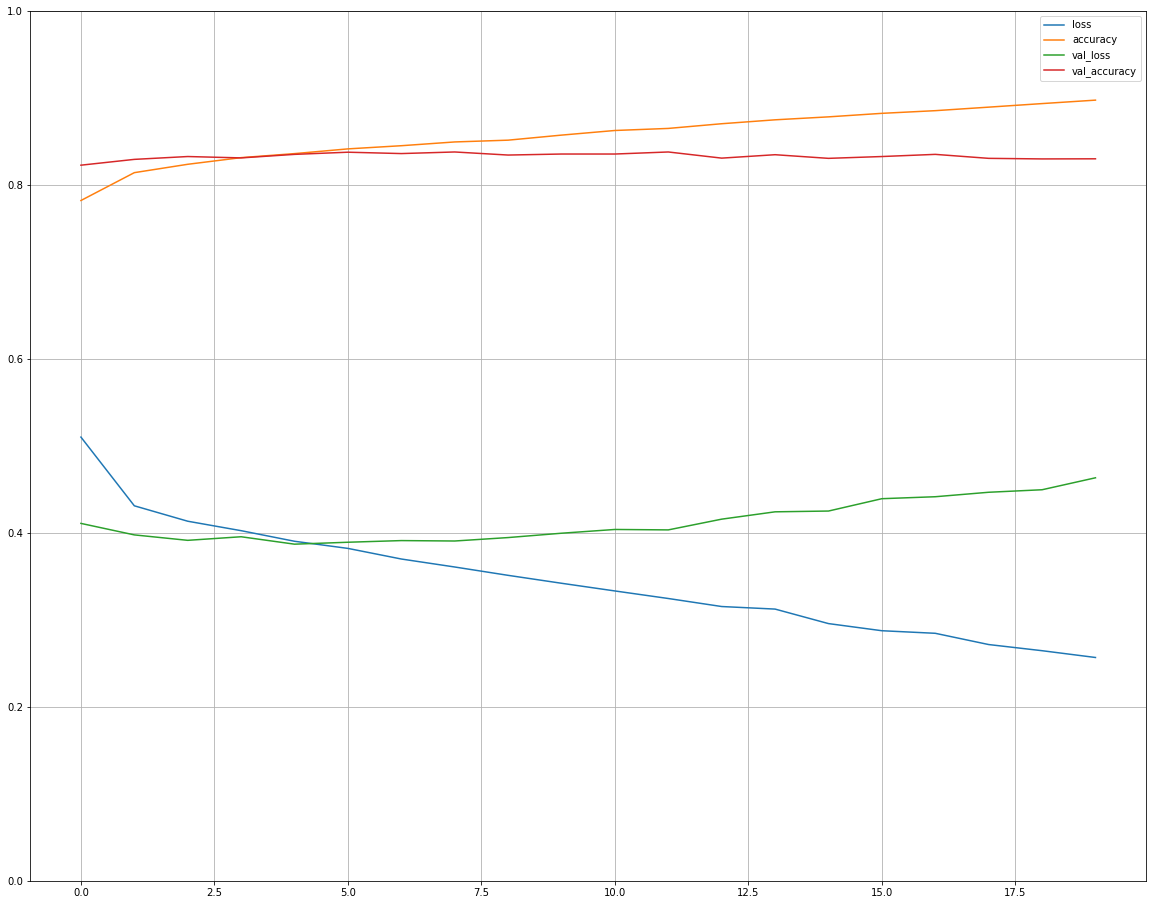

AxisError: axis 1 is out of bounds for array of dimension 1

In [175]:
# Performance

history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 16))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Performance
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred)
# print(accuracy_score(y_test, y_pred))